In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# スクラッチ

## 【問題1】train_test_splitのスクラッチ
スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます。

以下の雛形をベースとして関数を完成させてください。

なお、作成した関数がscikit-learnのtrain_test_splitと同じ動作をしているか必ず確認をするようにしましょう。

In [54]:
def scratch_train_test_split(X, y, random_state=0, train_size=0.75):
    """
    検証データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    
    #入力変数の整合性チェック
    #行の不一致チェック
    if len(X) != len(y):
        raise ValueError("Found input variables with inconsistent numbers of samples: {}".format((len(X), len(y))))
    
    #DataFrame型であれば型変換
    if type(X) is pd.core.frame.DataFrame:
        X = X.values
    
    if type(y) is  pd.core.frame.DataFrame:
        y = y.values
    
    #学習データと検証データの行数を取得
    num_all   = X.shape[0]
    num_train = int(num_all * train_size)
    num_test  = num_all - num_train
    
    #ランダムに振り分け
    np.random.seed(random_state)
    id_all = np.random.choice(num_all, num_all, replace=False)
    id_train = id_all[:num_train]
    id_test  = id_all[num_train:]
    
    #分割
    X_train = X[id_train, :]
    X_test  = X[id_test, :]
    y_train = y[id_train]
    y_test  = y[id_test]
    
    return X_train, X_test, y_train, y_test

確認

In [62]:
from sklearn.model_selection import train_test_split

X = np.random.normal(10, 2, (10, 2))
y = np.random.rand(10,2)

df_X = pd.DataFrame(data=X)
df_y = pd.DataFrame(data=y)

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train_scratch, X_test_scratch, y_train_scratch, y_test_scratch = scratch_train_test_split(X, y)

print("sklearn.function", "\n\n\n", X_train,"\n\n", X_test,"\n\n", y_train,"\n\n", y_test)
print("*"*40)
print("scratch.function", "\n\n\n", X_train_scratch,"\n\n", X_test_scratch,"\n\n", y_train_scratch,"\n\n", y_test_scratch)

sklearn.function 


 [[10.28808714 12.90854701]
 [11.90017684  9.69728558]
 [10.6261354   8.29180852]
 [ 4.89402037 11.30723719]
 [14.53950925  7.09126865]
 [11.52207545 10.24335003]
 [10.88772647 10.66734865]] 

 [[11.7288724   8.51566996]
 [ 9.7935623  10.821197  ]
 [12.98815815  9.58968347]] 

 [[0.94374808 0.6818203 ]
 [0.0187898  0.6176355 ]
 [0.21038256 0.1289263 ]
 [0.31542835 0.36371077]
 [0.98837384 0.10204481]
 [0.3595079  0.43703195]
 [0.6976312  0.06022547]] 

 [[0.57019677 0.43860151]
 [0.61209572 0.616934  ]
 [0.66676672 0.67063787]]
****************************************
scratch.function 


 [[10.28808714 12.90854701]
 [11.7288724   8.51566996]
 [10.88772647 10.66734865]
 [14.53950925  7.09126865]
 [ 9.7935623  10.821197  ]
 [10.6261354   8.29180852]
 [ 4.89402037 11.30723719]] 

 [[11.52207545 10.24335003]
 [11.90017684  9.69728558]
 [12.98815815  9.58968347]] 

 [[0.94374808 0.6818203 ]
 [0.57019677 0.43860151]
 [0.6976312  0.06022547]
 [0.98837384 0.10204481]
 [0.61

# scikit-learnを用いて機械学習を行うコードを作成

scikit-learnを使ったコードを作成していきます。


検証データの分割には問題1で作成した自作の関数を用いてください。クロスバリデーションではなくホールドアウト法で構いません。


分類問題
分類は3種類の手法をスクラッチします。


* ロジスティック回帰
* SVM
* 決定木

ロジスティック回帰はscikit-learnにおいてLogisticRegressionクラスとSGDClassifierクラスの2種類から使用できます。
ここでは勾配降下法を用いて計算するSGDClassifierクラスを利用してください。
引数でloss="log"とすることでロジスティック回帰の計算になります。


データセットは3種類用意します。

1つ目は事前学習期間同様にirisデータセットです。

2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。

* virgicolorとvirginica

残り2つは特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。
「シンプルデータセット1」「シンプルデータセット2」とします。特徴量が2つであるため可視化が容易です。

## 【問題2】 分類問題を解くコードの作成
上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。

### Irisデータセット

In [100]:
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#データの準備
iris_data = load_iris()
X = iris_data.data[50:]
y = iris_data.target[50:]

In [106]:
#ホールドアウト法での分割
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y)

#ロジスティック回帰
lr = SGDClassifier(loss="log")
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print("============ LogisticRegression ============")
print("confusion matrix:","\n", confusion_matrix(y_test, pred))
print()
print("accuracy score;","\n", accuracy_score(y_test, pred))
print()

#SVM
svc = SVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

print("============ SVM ============")
print("confusion matrix:","\n", confusion_matrix(y_test, pred))
print()
print("accuracy score;","\n", accuracy_score(y_test, pred))
print()

#決定木
print("============ DecisionTree ============")
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)

print("confusion matrix:","\n", confusion_matrix(y_test, pred))
print()
print("accuracy score;","\n", accuracy_score(y_test, pred))
print()

============ LogisticRegression ============
confusion matrix: 
 [[1 4]
 [3 2]]

accuracy score; 
 0.3

============ SVM ============
confusion matrix: 
 [[3 2]
 [2 3]]

accuracy score; 
 0.6

============ DecisionTree ============
confusion matrix: 
 [[5 0]
 [0 5]]

accuracy score; 
 1.0



### シンプルデータセット作成コード１

In [114]:
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [115]:
#ホールドアウト法での分割
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y)

#ロジスティック回帰
lr = SGDClassifier(loss="log")
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print("============ LogisticRegression ============")
print("confusion matrix:","\n", confusion_matrix(y_test, pred))
print()
print("accuracy score;","\n", accuracy_score(y_test, pred))
print()

#SVM
svc = SVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

print("============ SVM ============")
print("confusion matrix:","\n", confusion_matrix(y_test, pred))
print()
print("accuracy score;","\n", accuracy_score(y_test, pred))
print()

#決定木
print("============ DecisionTree ============")
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)

print("confusion matrix:","\n", confusion_matrix(y_test, pred))
print()
print("accuracy score;","\n", accuracy_score(y_test, pred))
print()


============ LogisticRegression ============
confusion matrix: 
 [[65  0]
 [ 0 60]]

accuracy score; 
 1.0

============ SVM ============
confusion matrix: 
 [[65  0]
 [ 0 60]]

accuracy score; 
 1.0

============ DecisionTree ============
confusion matrix: 
 [[65  0]
 [ 0 60]]

accuracy score; 
 1.0



In [121]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


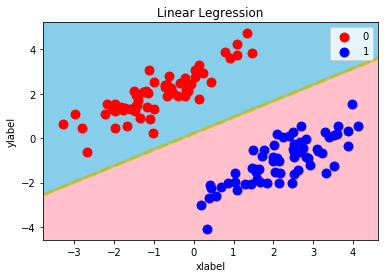

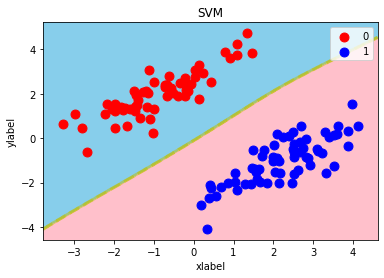

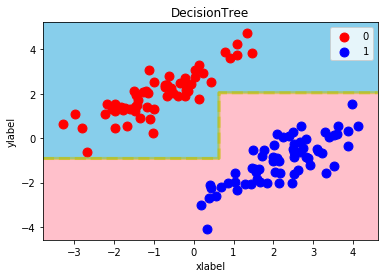

In [122]:
decision_region(X_test, y_test, lr, title="Linear Legression")
decision_region(X_test, y_test, svc, title="SVM")
decision_region(X_test, y_test, tree, title="DecisionTree")

### シンプルデータセット２作成コード

In [123]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [124]:
#ホールドアウト法での分割
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y)

#ロジスティック回帰
lr = SGDClassifier(loss="log")
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print("============ LogisticRegression ============")
print("confusion matrix:","\n", confusion_matrix(y_test, pred))
print()
print("accuracy score;","\n", accuracy_score(y_test, pred))
print()

#SVM
svc = SVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

print("============ SVM ============")
print("confusion matrix:","\n", confusion_matrix(y_test, pred))
print()
print("accuracy score;","\n", accuracy_score(y_test, pred))
print()

#決定木
print("============ DecisionTree ============")
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)

print("confusion matrix:","\n", confusion_matrix(y_test, pred))
print()
print("accuracy score;","\n", accuracy_score(y_test, pred))
print()


============ LogisticRegression ============
confusion matrix: 
 [[1 4]
 [3 2]]

accuracy score; 
 0.3

============ SVM ============
confusion matrix: 
 [[3 2]
 [2 3]]

accuracy score; 
 0.6

============ DecisionTree ============
confusion matrix: 
 [[5 0]
 [0 5]]

accuracy score; 
 1.0



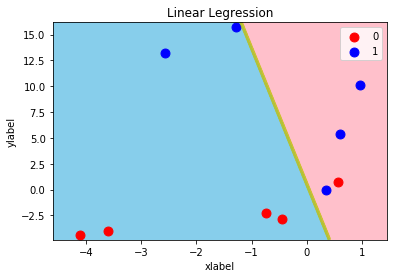

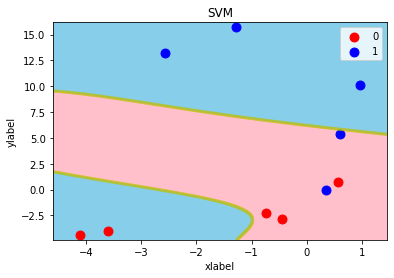

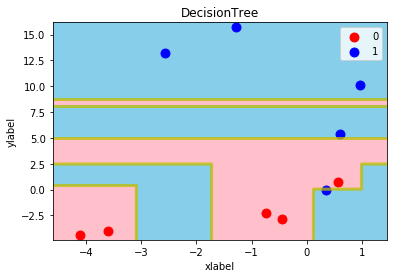

In [125]:
decision_region(X_test, y_test, lr, title="Linear Legression")
decision_region(X_test, y_test, svc, title="SVM")
decision_region(X_test, y_test, tree, title="DecisionTree")

# 回帰問題
回帰は1種類をスクラッチします。

* 線形回帰

線形回帰は勾配降下法を用いて計算するSGDRegressorクラスを利用してください。

データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。

[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

train.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。

## 【問題3】 回帰問題を解くコードの作成
線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。

In [131]:
train = pd.read_csv("train.csv")
X = train[["GrLivArea", "YearBuilt"]]
y = train["SalePrice"]

In [132]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y)

In [133]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

lrg = SGDRegressor()
lrg.fit(X_train, y_train)
pred = lrg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
print("========== LinearRegression ==========")
print("RMSE:", "\n", rmse)

========== LinearRegression ==========
RMSE: 
 2376462963643899.5
